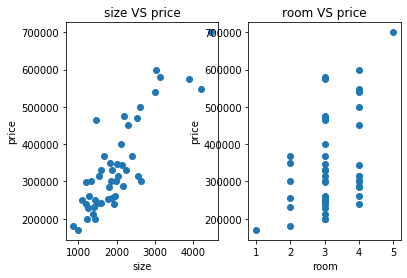

[352556.16062007 416731.76567896 159496.44806424 269963.59213951
 610716.0570625  228151.72874745 274976.83267087 384128.38399774
 432517.8773678  308788.8938607  441726.35907863 326281.6122186
 285607.48660592 226054.10815772 261857.21046145]
0.3769832742600078
[484142.72910697 645523.63880929]


In [9]:
import numpy as np
import pandas as pd
import matplotlib as plt
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def ReadTxtToDataFrame():
    txt_path="D://semester2020.2//Neutral Network//作业1005//ex1data2.txt"
    fp=pd.read_csv(txt_path,names=['size','room','price'])
    return fp
#def LinearModel():
def DrawData(data):
    %matplotlib inline
    ax1=plt.subplot(121)
    plt.title("size VS price")
    plt.xlabel("size")
    plt.ylabel("price")
    plt.scatter(data["size"],data["price"])
    ax2=plt.subplot(122)
    plt.title("room VS price")
    plt.xlabel("room")
    plt.ylabel("price")
    plt.scatter(data["room"],data["price"])
    plt.show()
def TrainTestData(data):
    x=data.drop(["price"],axis="columns")
    y=data["price"]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
    clf=LinearRegression(fit_intercept=False)
    clf.fit(x_train,y_train)
    print(clf.predict(x_test))#预测值
    print(clf.score(x_test,y_test))#得分越接近1 模型越精确，y的变化被x解释了78%
    x_pre=pd.DataFrame({"size":[3000,4000],
                        "room":[3,4]})
    print(clf.predict(x_pre))#通过训练建立
    #实现回归方程cost function
    '''
    beta_hat=np.linalg.inv(x_train.T.dot(x_train))#linalg是线性代数的函数，求矩阵平方的逆
    print("矩阵平方的逆是：",beta_hat)
    y_hat=x_test.dot(beta_hat)
    print(y_hat)
    '''
fp=ReadTxtToDataFrame()
DrawData(fp)
TrainTestData(fp)
 


       size      room     price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389


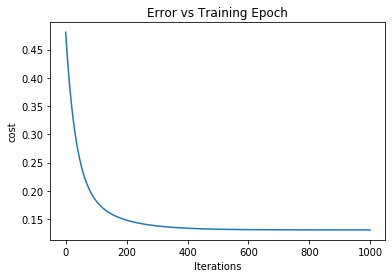

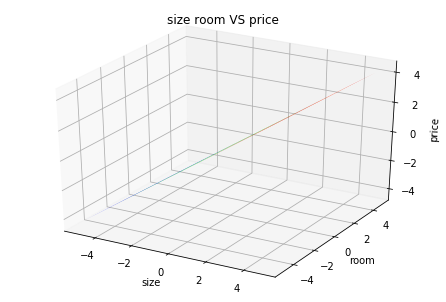

In [12]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
txt_path="D://semester2020.2//Neutral Network//作业1005//ex1data2.txt"
fp=pd.read_csv(txt_path,names=['size','room','price'])
#fp.head()    
#数据归一化 z-score方法：z=x-均值/标准差
fp=(fp-fp.mean())/fp.std()
print(fp.head())
#处理数据
fp.insert(0,'one',1)#第一列数据名称one，数值1
cols=fp.shape[1]#获取行长
x2=fp.iloc[:,0:cols-1].values
y2=fp.iloc[:,cols-1:cols].values
theta=np.zeros((cols-1,1))
#计算损失函数
def computeCost(x2,y2,theta):
    temp=np.dot(x2,theta)-y2
    cost=np.sum(np.power(temp,2))/(2*len(x2))
    return cost
def gradientDescent(x2,y2,theta,alpha,iters,m=len(x2)):
    j=[]
    for i in range(iters):
        temp=theta-(alpha/m)*np.dot((np.dot(x2,theta)-y2).T,x2[:]).T
        theta=temp
        j.append(computeCost(x2,y2,theta))
    return theta,j
#迭代
alpha=0.01
iters=1000
final_theta,cost2=gradientDescent(x2,y2,theta,alpha,iters,m=len(x2))
#final_theta是三个参数
theta0=final_theta[0]
theta1=final_theta[1]
theta2=final_theta[2]
#计算最终损失值
computeCost(x2,y2,final_theta)
#cost可视化
plt.figure()
list=[i for i in range(1000)]
plt.plot(list,cost2)
plt.xlabel("Iterations")
plt.ylabel('cost')
plt.title('Error vs Training Epoch')
plt.show()
#绘制二元函数图像
fig=plt.figure()
ax=Axes3D(fig)
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)
x,y=np.meshgrid(x,y)
z=theta0[0]+theta1[0]*x+theta2[0]*y
ax.set_title('size room VS price')
ax.set_xlabel('size')
ax.set_ylabel('room')
ax.set_zlabel('price')
ax.plot_surface(x,y,z,rstride=1,cstride=1,alpha=1,linewidth=10,cmap="rainbow")
plt.show()
